##### Get B_NEC data at 10s sampling, residual to MCO_SHA_2C

In [2]:
from viresclient import SwarmRequest
import datetime as dt

request = SwarmRequest(url="https://staging.viresdisc.vires.services/openows")
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC"],
                     models=["MCO_SHA_2C"],
                     auxiliaries=["QDLat", "QDLon", "OrbitNumber"],
                     residuals=True,
                     sampling_step="PT10S")

data = request.get_between(start_time=dt.datetime(2016,1,1),
                           end_time=dt.datetime(2016,1,2))

ds = data.as_xarray()
ds

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.671MB)


<xarray.Dataset>
Dimensions:               (Timestamp: 8640, dim: 3)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2016-01-01 ...
Dimensions without coordinates: dim
Data variables:
    Spacecraft            (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' ...
    Latitude              (Timestamp) float64 -72.5 -73.13 -73.76 -74.39 ...
    Longitude             (Timestamp) float64 92.79 93.09 93.41 93.77 94.15 ...
    Radius                (Timestamp) float64 6.834e+06 6.834e+06 6.834e+06 ...
    B_NEC_res_MCO_SHA_2C  (Timestamp, dim) float64 -4.765 -185.1 -78.68 ...
    QDLat                 (Timestamp) float64 -81.1 -81.43 -81.73 -82.0 ...
    QDLon                 (Timestamp) float64 103.6 100.2 96.48 92.53 88.34 ...
    OrbitNumber           (Timestamp) int32 11803 11803 11803 11803 11803 ...

##### Use cartopy to plot the vertical component of the residual, over each polar region

https://scitools.org.uk/cartopy/docs/v0.15/gallery.html

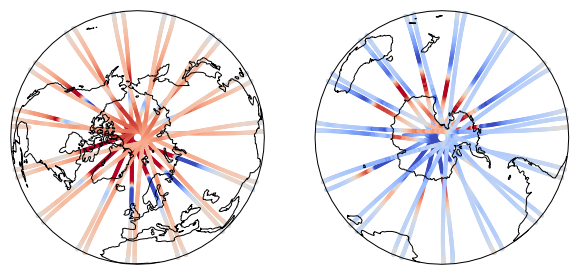

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline

cmap = cm.coolwarm
norm = Normalize(vmin=-100,vmax=100)

fig = plt.figure(figsize=[10, 5])
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

def plot_hs(ax, ds):
    ax.scatter(ds.Longitude, ds.Latitude, c=ds.B_NEC_res_MCO_SHA_2C[:,2], transform=ccrs.PlateCarree(),
                  s=10, cmap=cmap, norm=norm)
    ax.set_global(); ax.coastlines();

dsN = ds.where(ds["Latitude"] > 0)
dsS = ds.where(ds["Latitude"] < 0)
for ax, ds_subset in zip([ax1, ax2], [dsN, dsS]):
    plot_hs(ax, ds_subset)

There is a hemispheric bias because we haven't accounted for the magnetospheric field